 ## Manifold learning


The MNIST dataset contains images of size 28 x 28. So the image is sitting in a 784 dimensional space. The meaningful images of digits from 0 to 9 are clustered in a subset of this space with smaller dimension.This is called as manifold hypothesis.

In [16]:
import os

import numpy as np
import pandas as pd

#always define matplotlib inline before the original library import
%matplotlib inline
import matplotlib.pyplot as plt


from sklearn import metrics
from sklearn.neighbors import NearestNeighbors

os.environ['KERAS_BACKEND']='tensorflow'

#Keras imports
from keras.models import Sequential,Model

from keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten,Input
from keras.optimizers import adam
from keras.utils.np_utils import to_categorical
%config InlineBackend.figure_format = 'retina'

In [13]:
train = pd.read_csv("/home/akshaynathr/Script/ML/data/train.csv")
train.head()




,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
X_train = train.iloc[:,1:].values
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
X_train.shape

(42000, 784)

In [22]:
X_train = X_train.reshape(X_train.shape[0],28,28)
X_train[0].shape


(28, 28)

In [23]:
def showImg(img):
    plt.imshow(img,cmap="gray",interpolation="none")


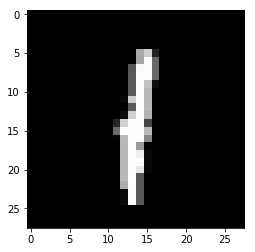

In [54]:
showImg(X_train[12])

## Learning manifold with an autoEncoder

Let us use an autoencoder to reduce the dimensionality. This helps to find the relevant combinations of dimensions that
are important out of 784.

An autoencoder is a feed forward artificial neural network.The autoencoder is forced to reconstruct the image from a smaller 
representation of the original image. In this process it only accounts the relevant dimensions and discards the remaining.



In [24]:
input_img = Input(shape=(784,))
encoder = Dense(64,activation='relu')(input_img)
encoder =Dense(2)(encoder)

decoder = Dense(64,activation='relu')(encoder)
decoder = Dense(784,activation='sigmoid')(decoder)

autoencoder= Model(input=input_img,output=decoder)


/home/akshaynathr/.conda/envs/DL/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=sigmoid.0, inputs=/input_3)`
  


In [26]:
X_flat = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])

In [27]:
autoencoder.compile(optimizer = "adam", loss = "mse")
autoencoder.fit(X_flat, X_flat, batch_size = 128,
                nb_epoch = 10, verbose = 3)

/home/akshaynathr/.conda/envs/DL/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
